In [ ]:
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Set the Kaggle API key environment variables
os.environ['KAGGLE_USERNAME'] = 'subirkumaramit'  # Your Kaggle username
os.environ['KAGGLE_KEY'] = '7c0486c21fcba18beead18d2ae1eddcd'  # Your Kaggle API key

# Correct dataset identifier for IBM HR Analytics Attrition Dataset
# The dataset you referenced may have a different identifier; verify it on Kaggle.
dataset_identifier = 'pavansubhasht/ibm-hr-analytics-attrition-dataset'

# Download the dataset
!kaggle datasets download -d {dataset_identifier}

# Unzip the dataset
with ZipFile('ibm-hr-analytics-attrition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('ibm-hr-analytics-attrition-dataset')

# Load and display the dataset (use the correct file name inside the unzipped folder)
# Check the extracted files to find the correct CSV file name.
data_file_name = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'  # Update if necessary
data = pd.read_csv(os.path.join('ibm-hr-analytics-attrition-dataset', data_file_name))
print(data.head())

# # URL of the raw CSV file from GitHub
# url = "https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv"

# # Read the CSV file into a DataFrame
# data= pd.read_csv(url)

# # Display the first few rows of the DataFrame
# print(data.head())


Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4  

#**Exploratory Data Analysis**



In [ ]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


**EDA**

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


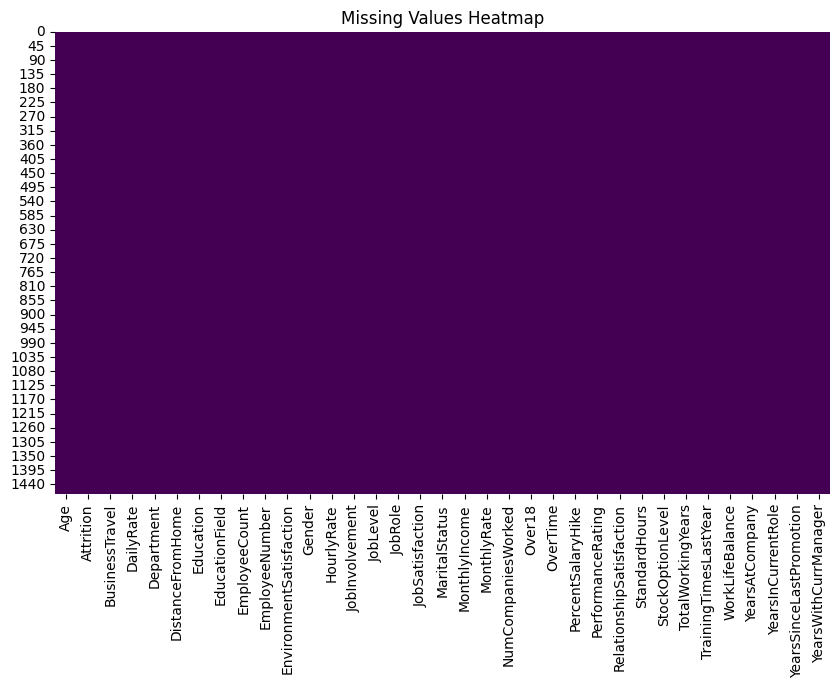

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The graph shows that there is no missing values.

#**Basic Data Cleaninng and Analysis**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Attrition'] = data['Attrition'].astype('category')
data['Department'] = data['Department'].astype('category')
data['EducationField'] = data['EducationField'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['JobRole'] = data['JobRole'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')


In [ ]:

scaler = StandardScaler()
numerical_cols = ['Age', 'DistanceFromHome', 'YearsAtCompany', 'JobInvolvement', 'PerformanceRating', 'TotalWorkingYears']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

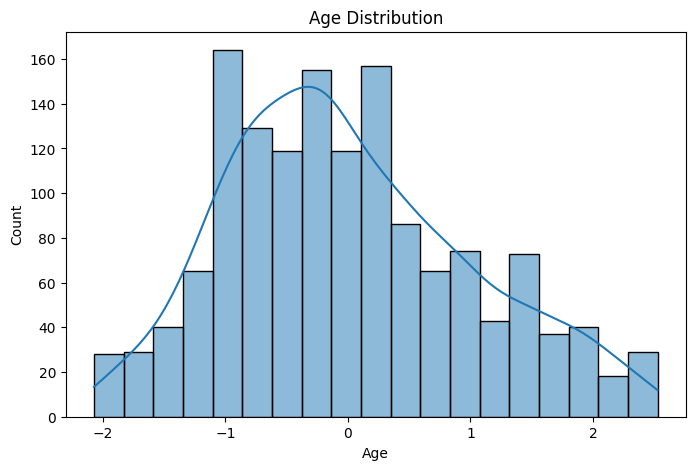

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Universal Analysis

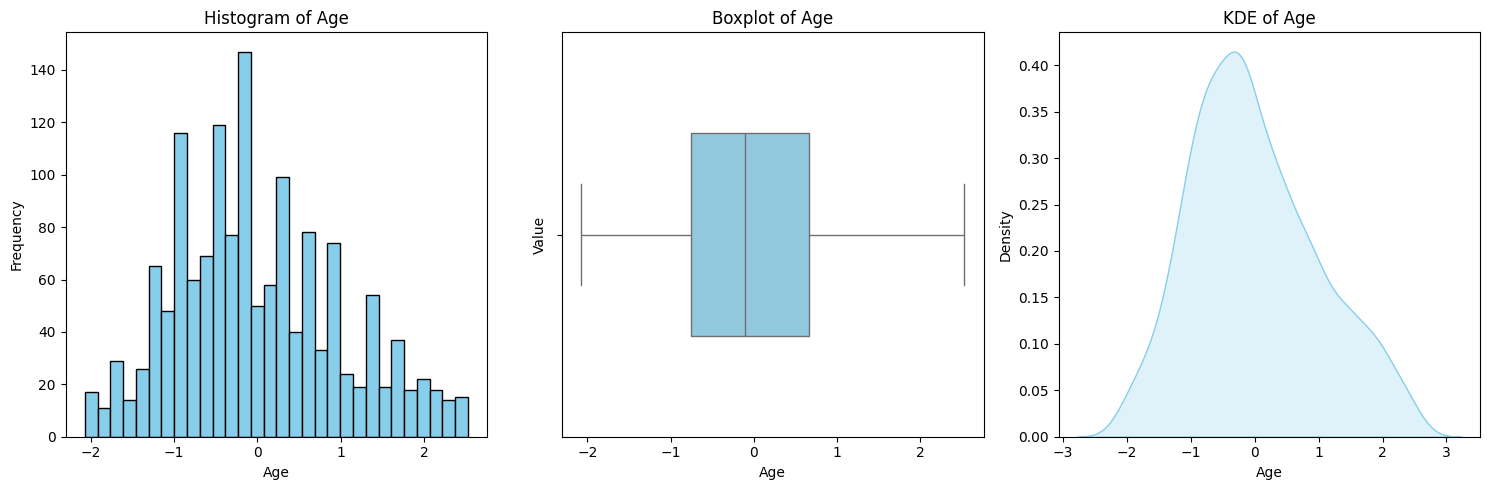

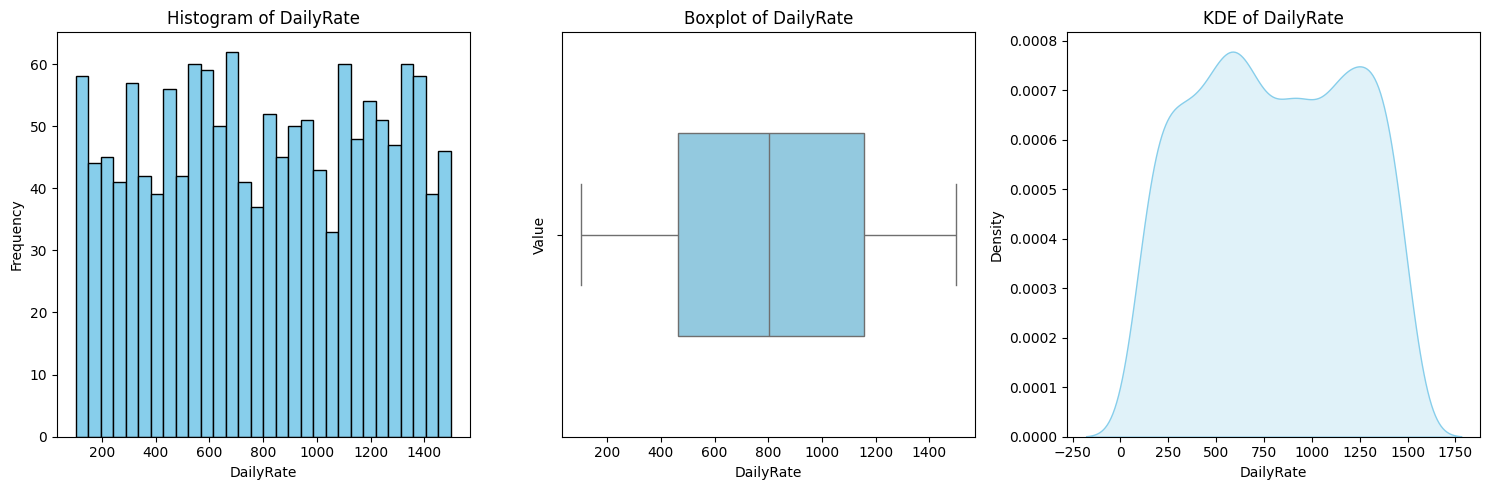

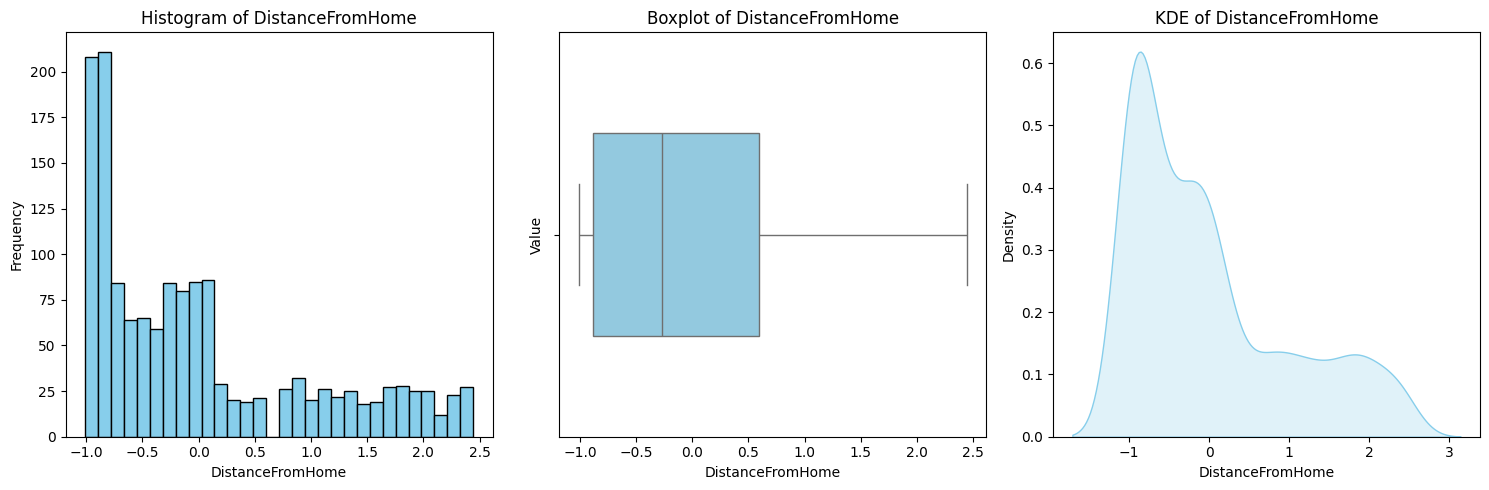

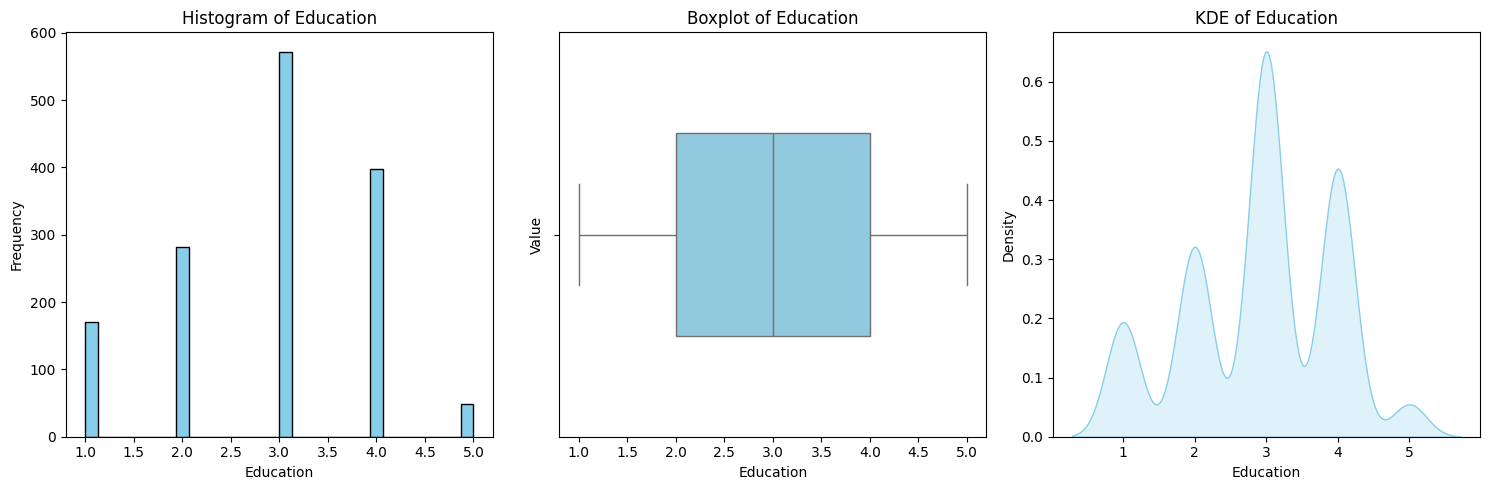

<ipython-input-66-016c5011eeac>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='skyblue', fill=True)


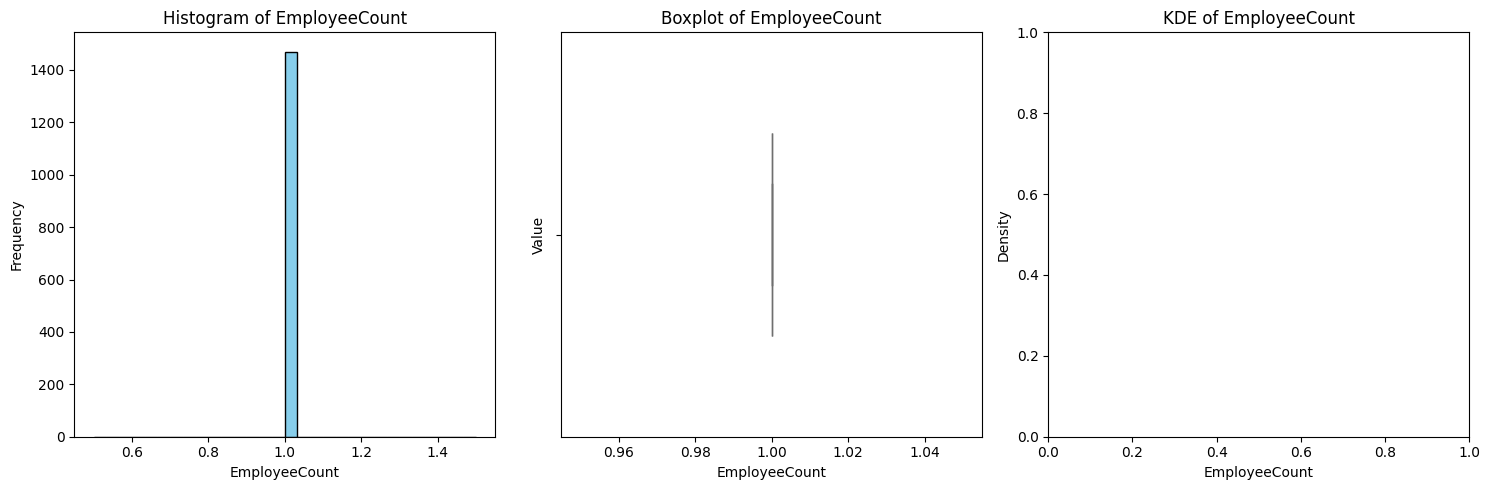

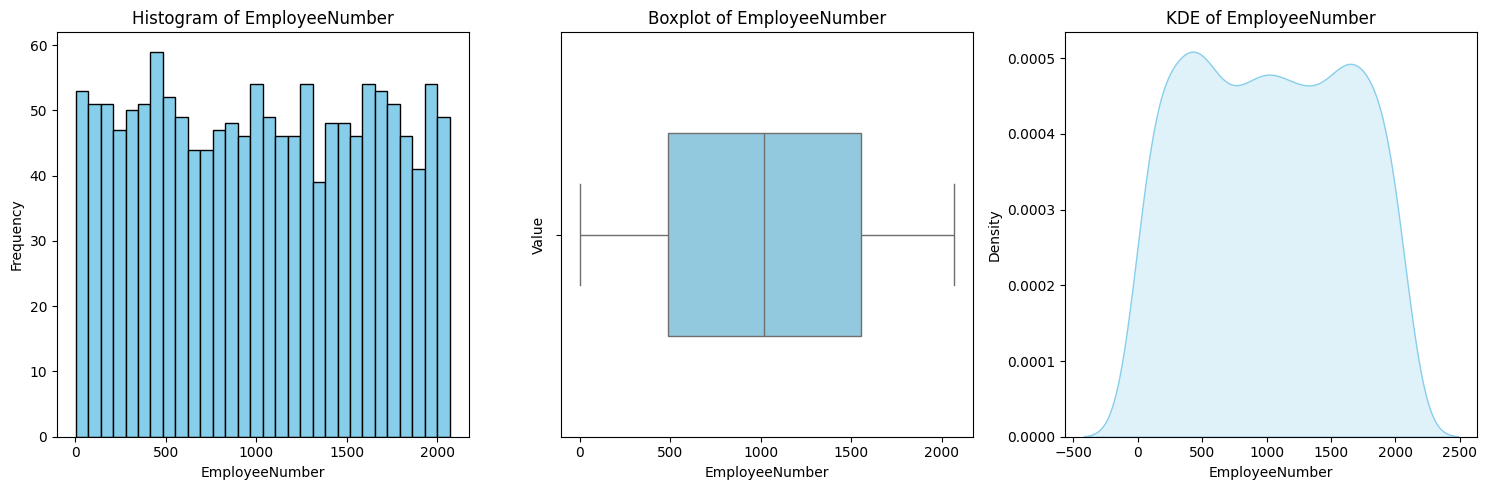

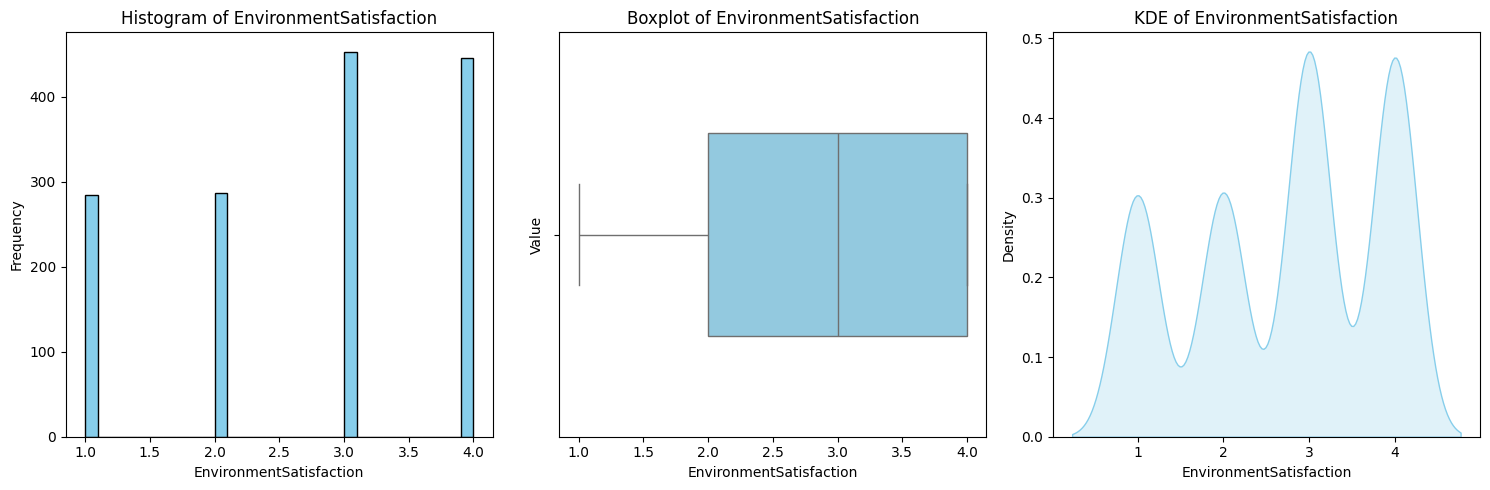

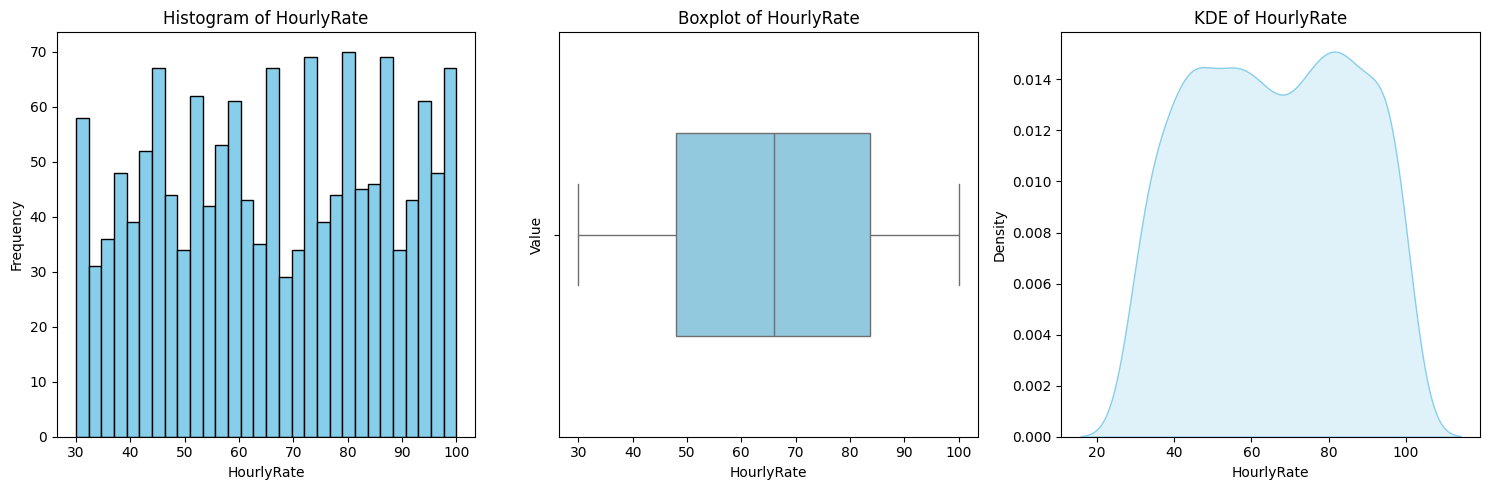

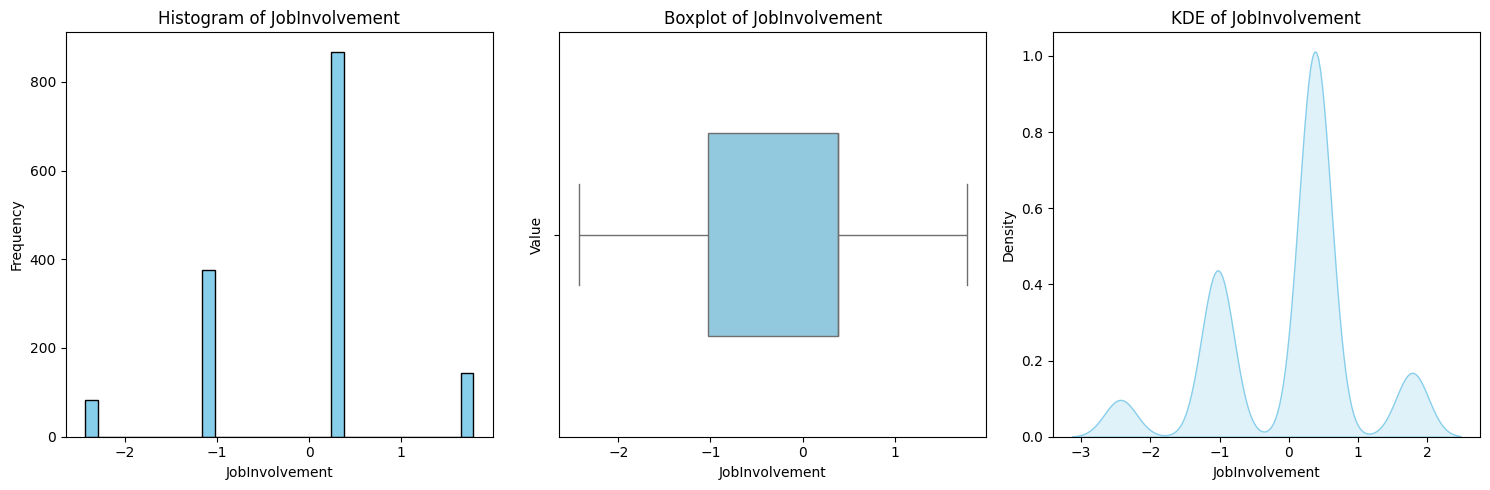

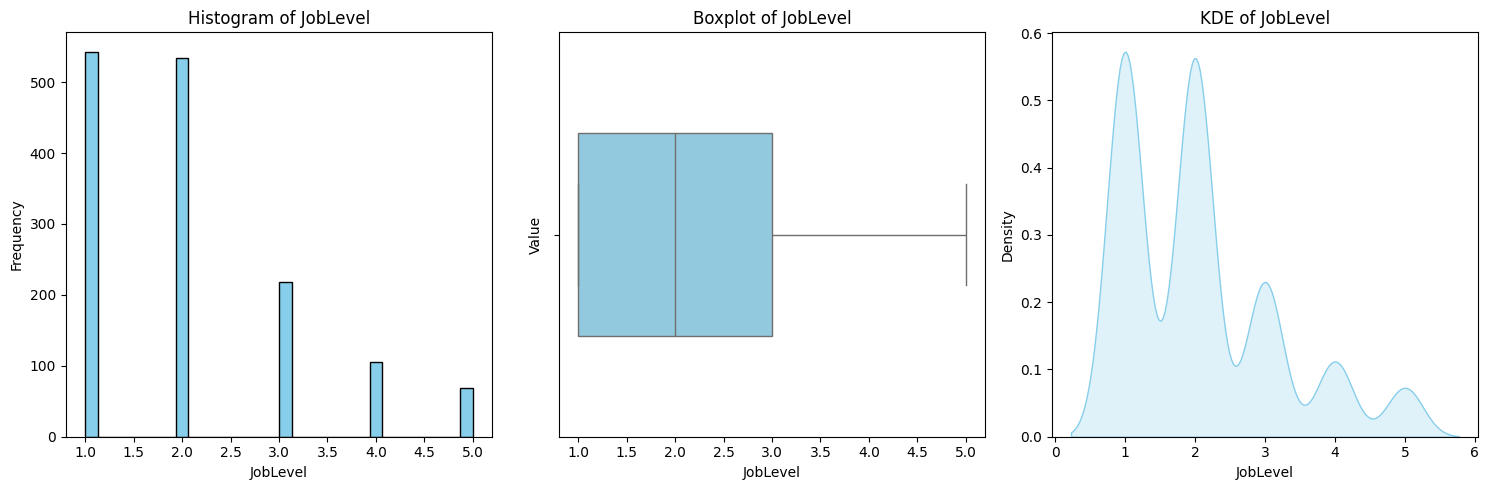

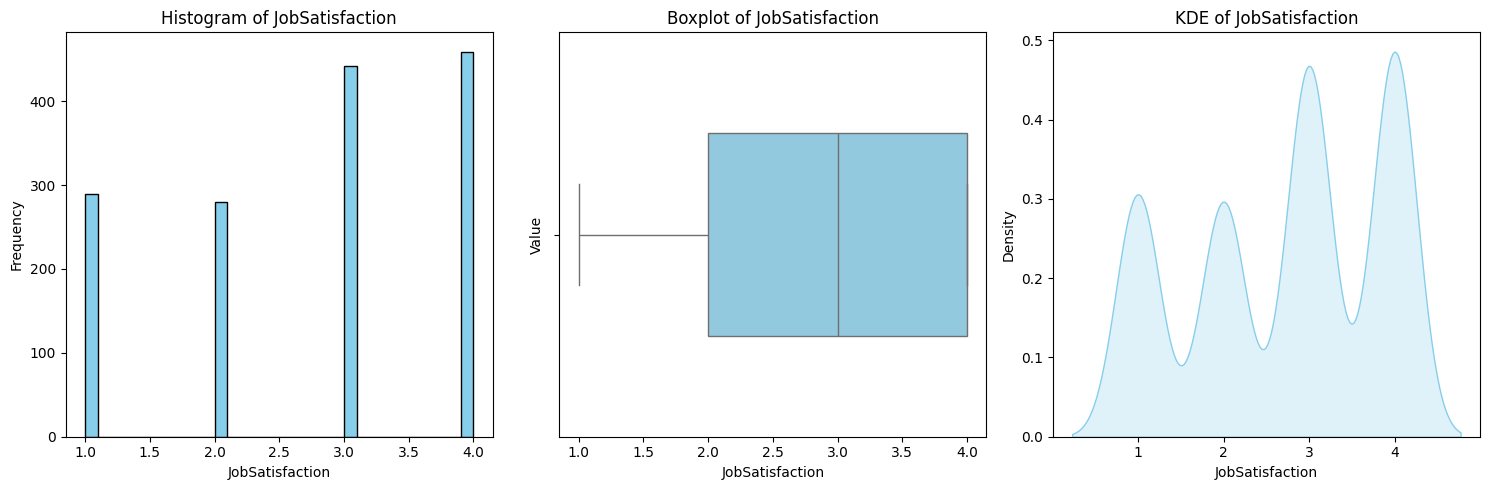

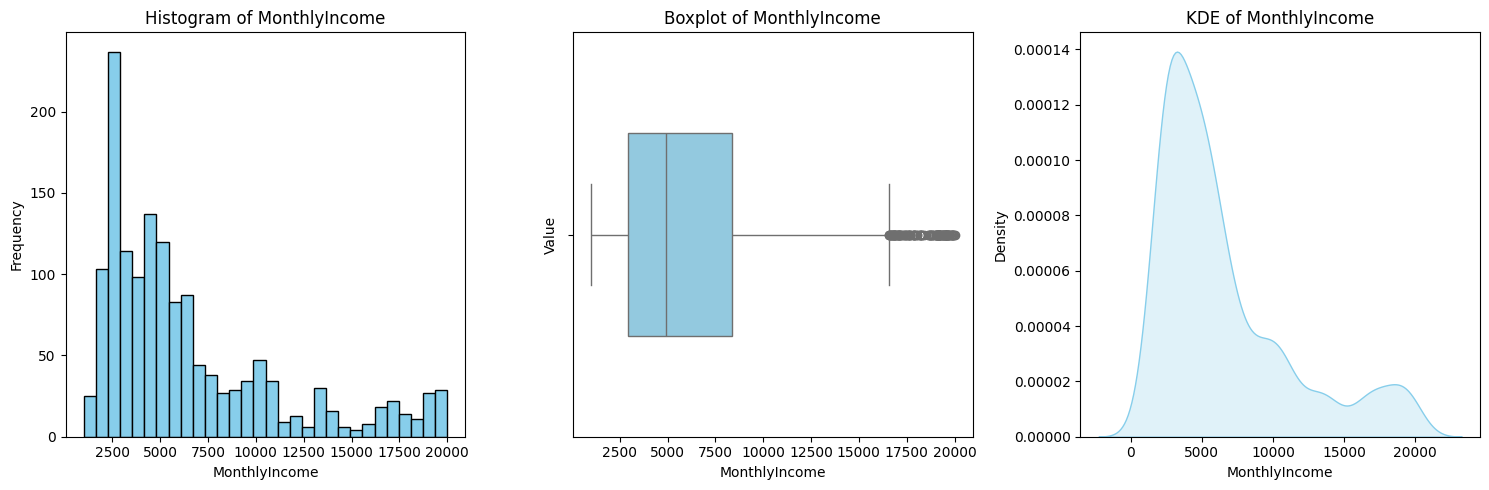

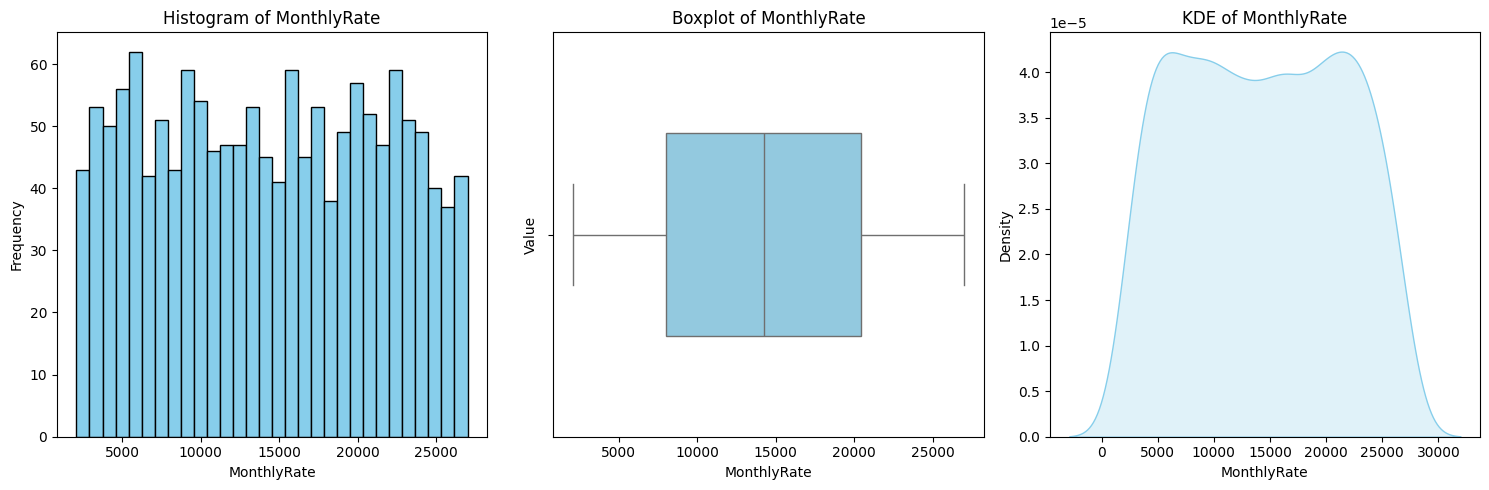

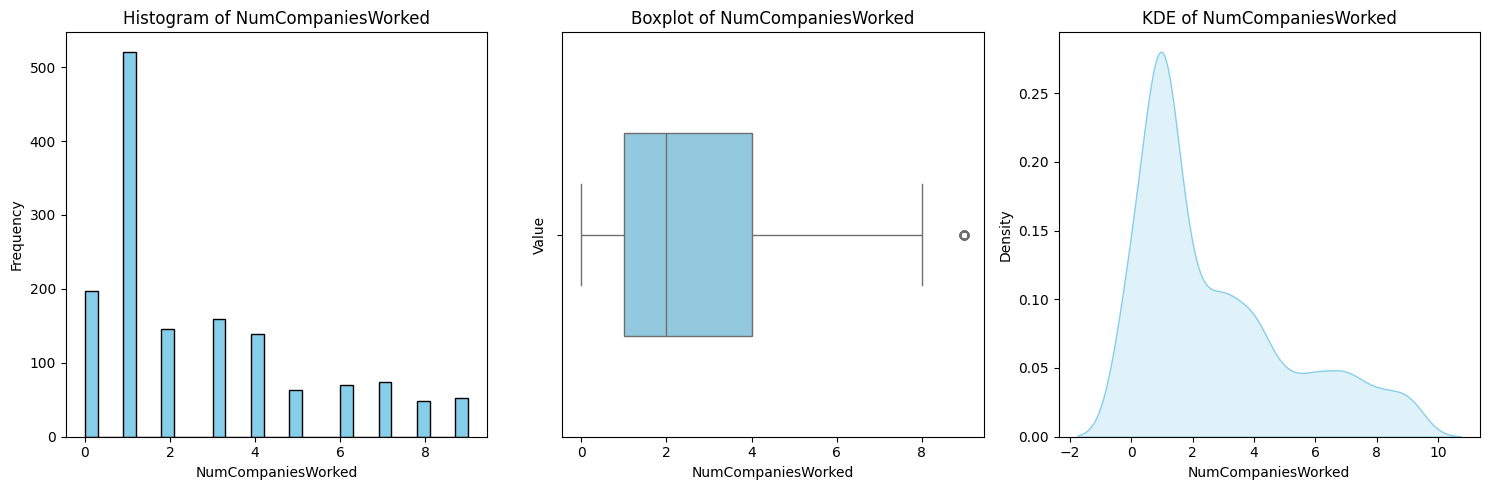

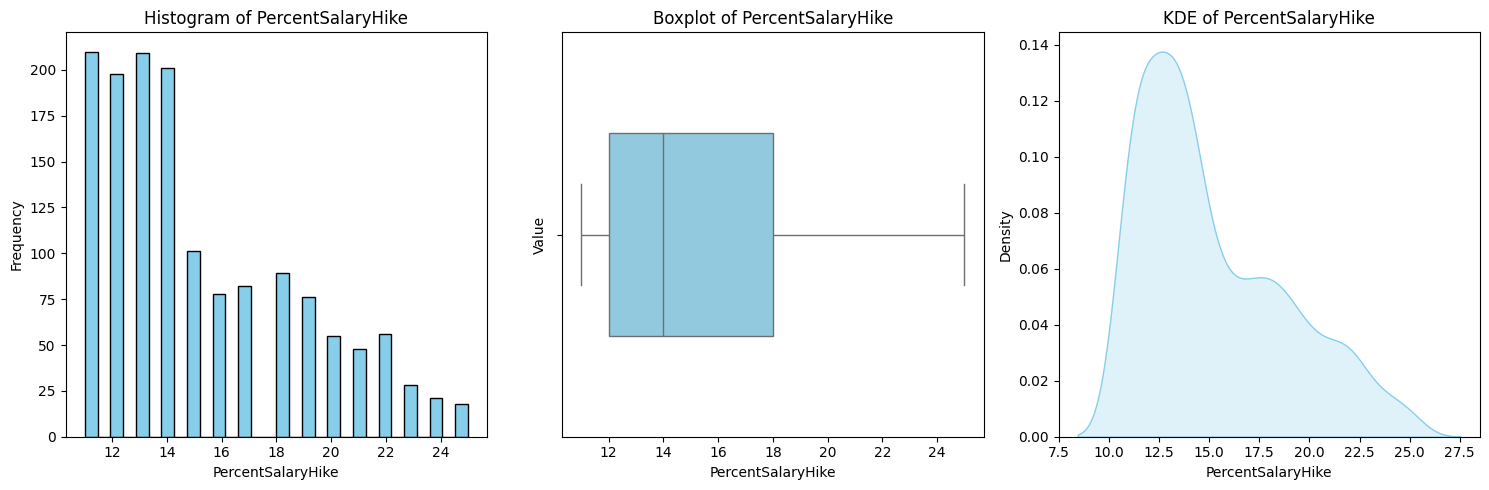

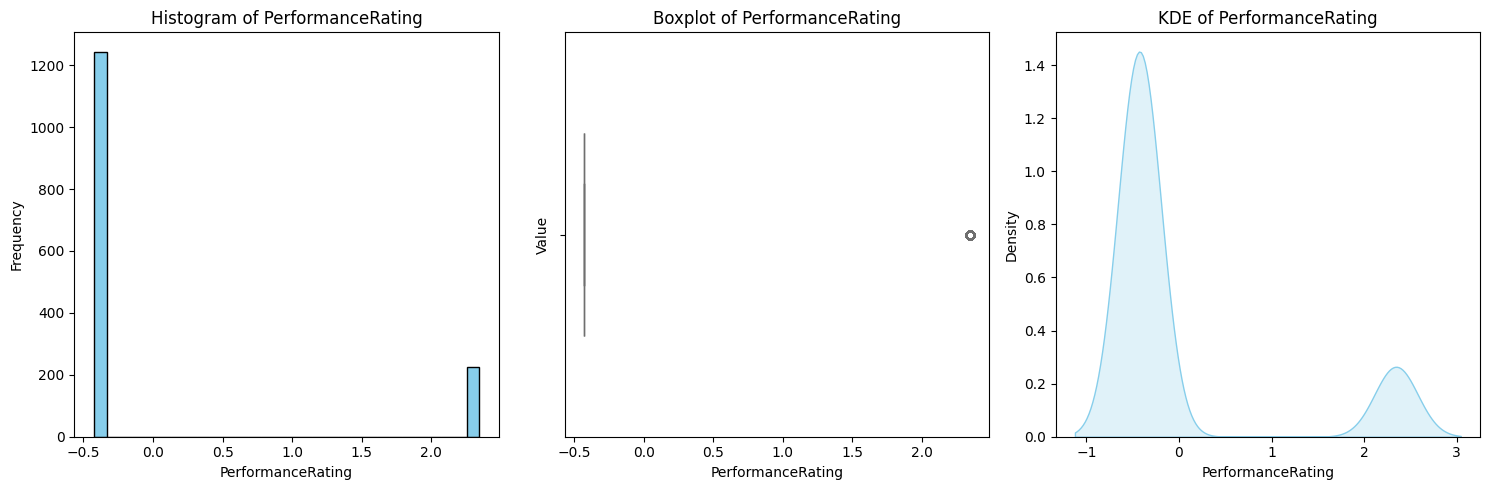

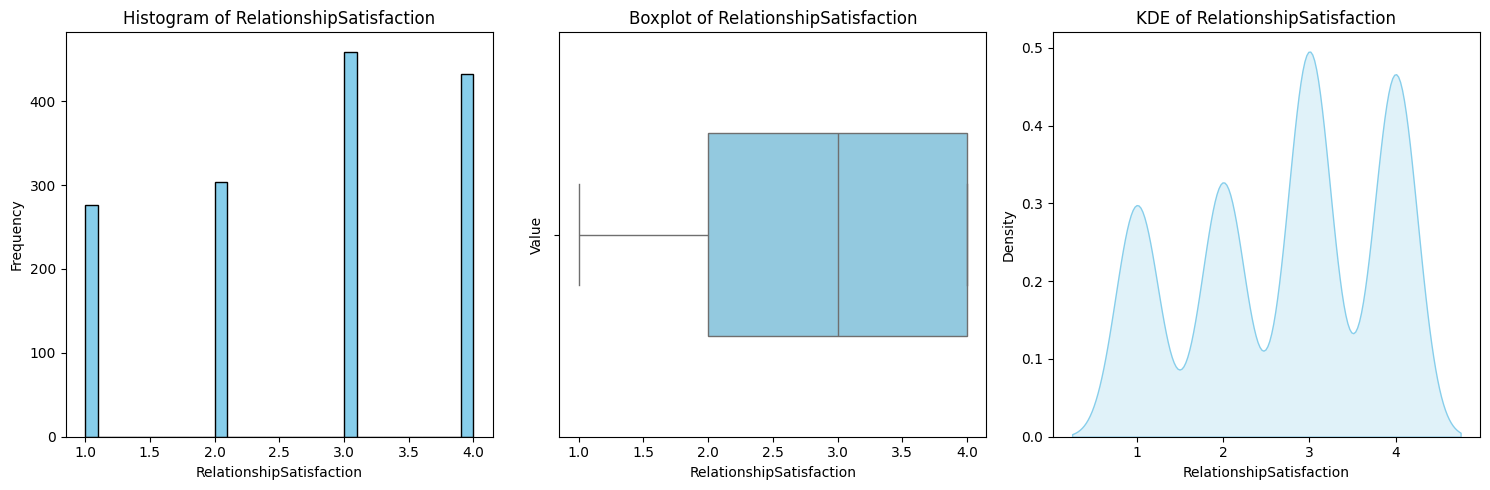

<ipython-input-66-016c5011eeac>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='skyblue', fill=True)


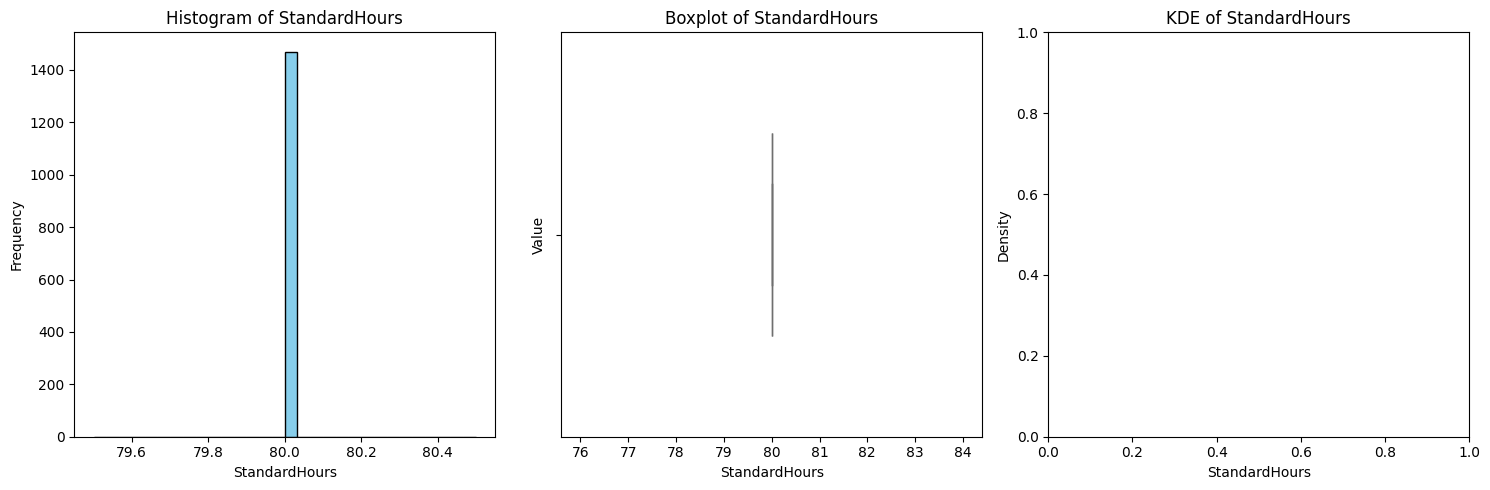

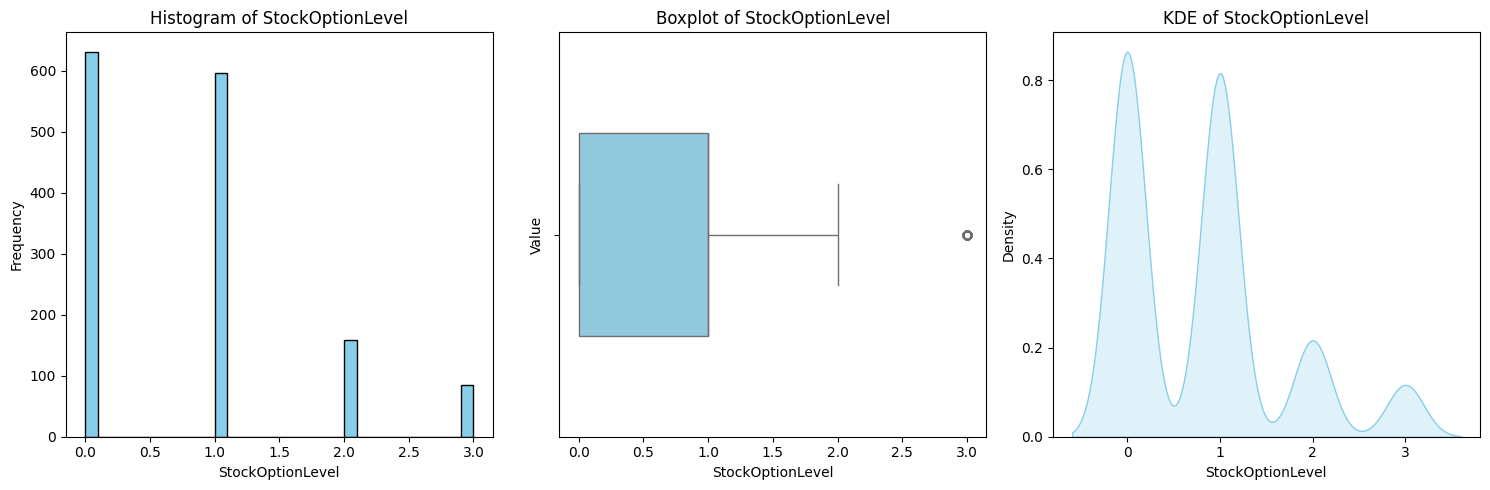

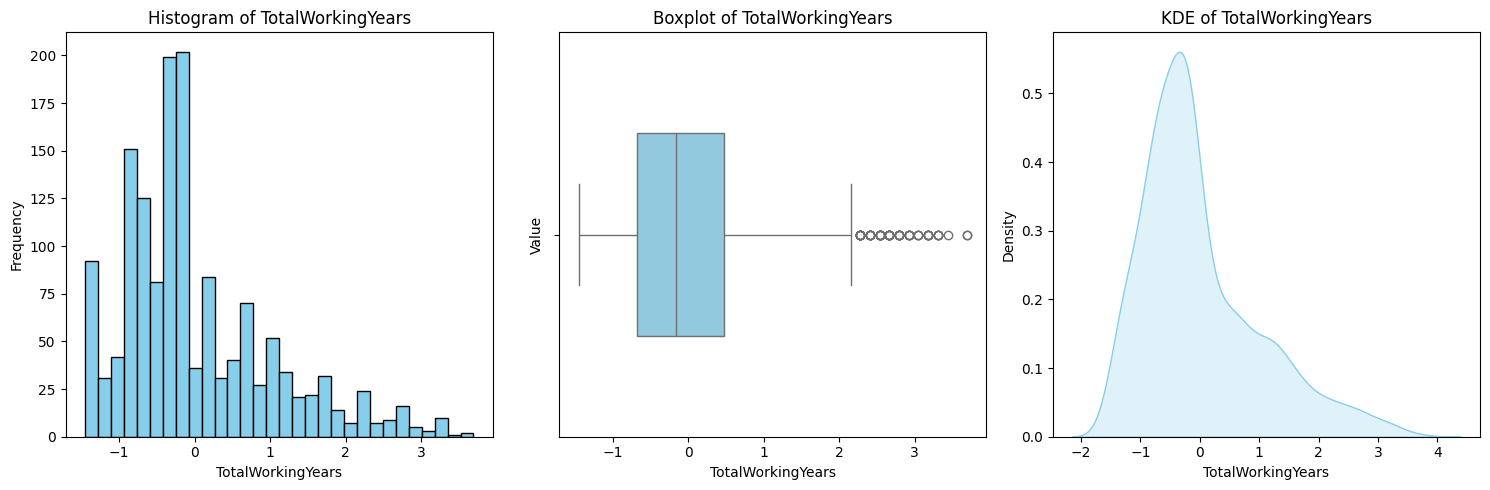

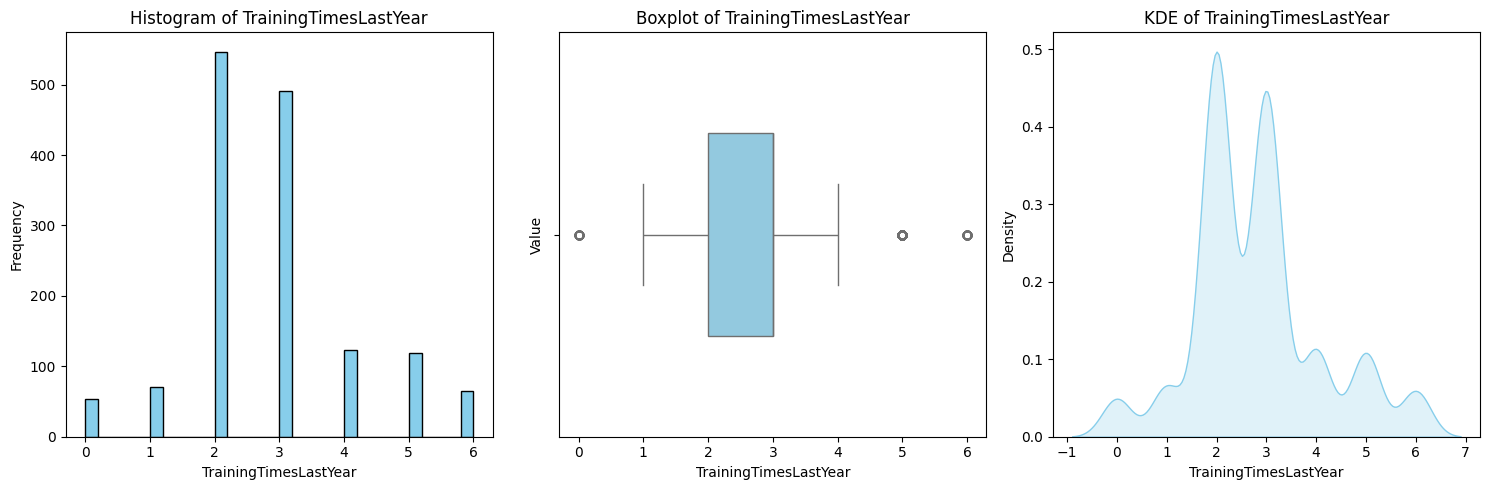

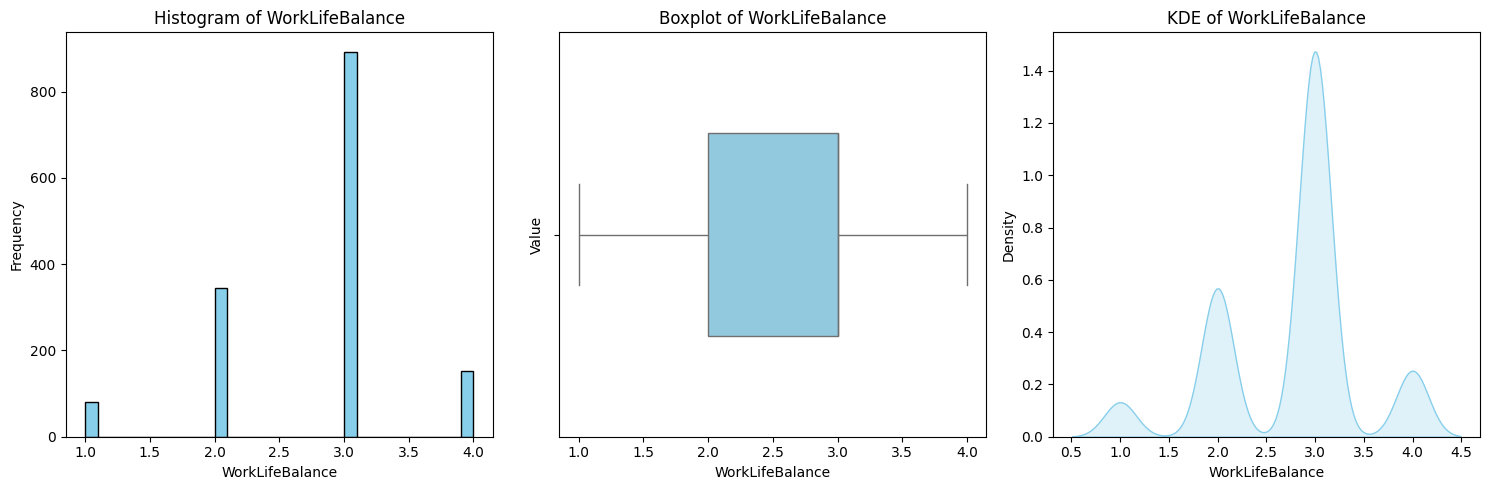

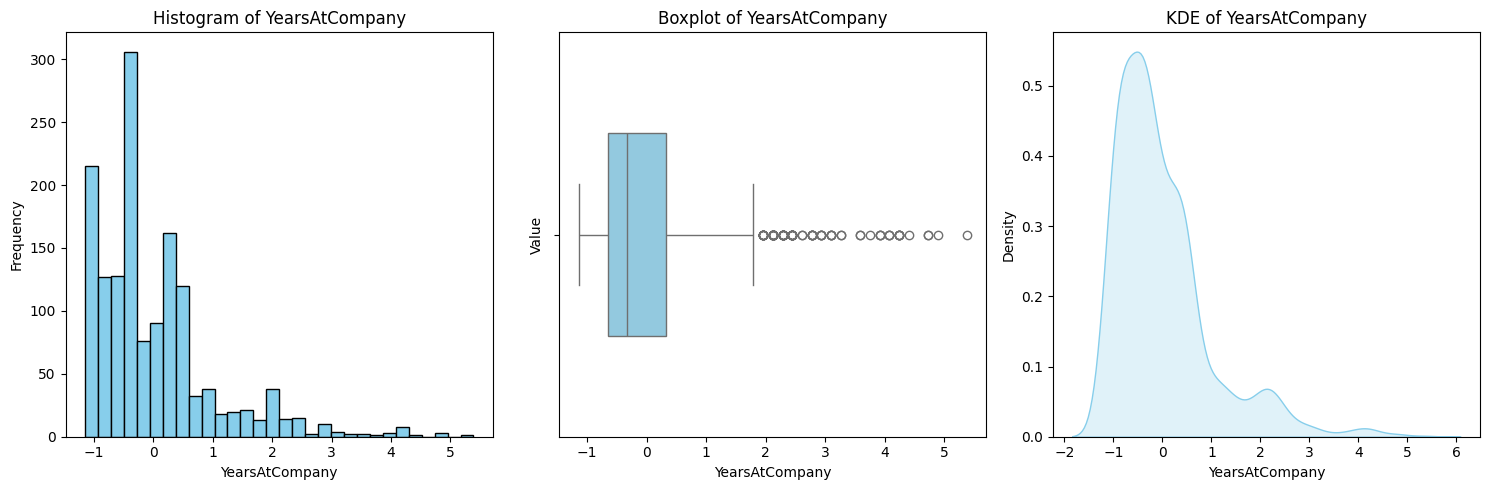

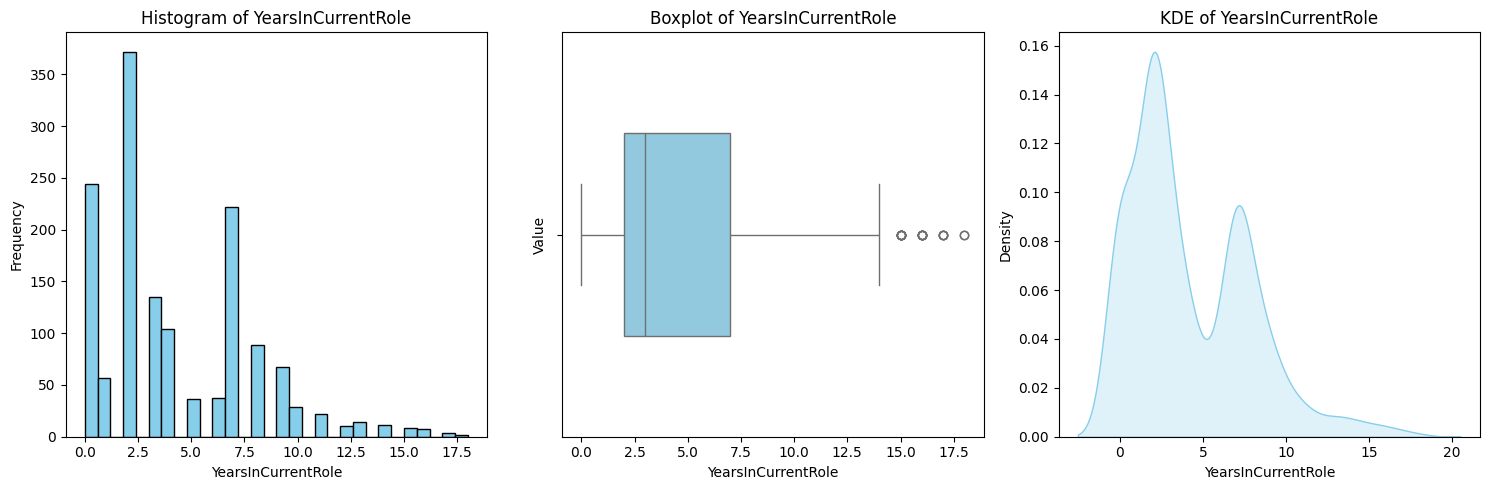

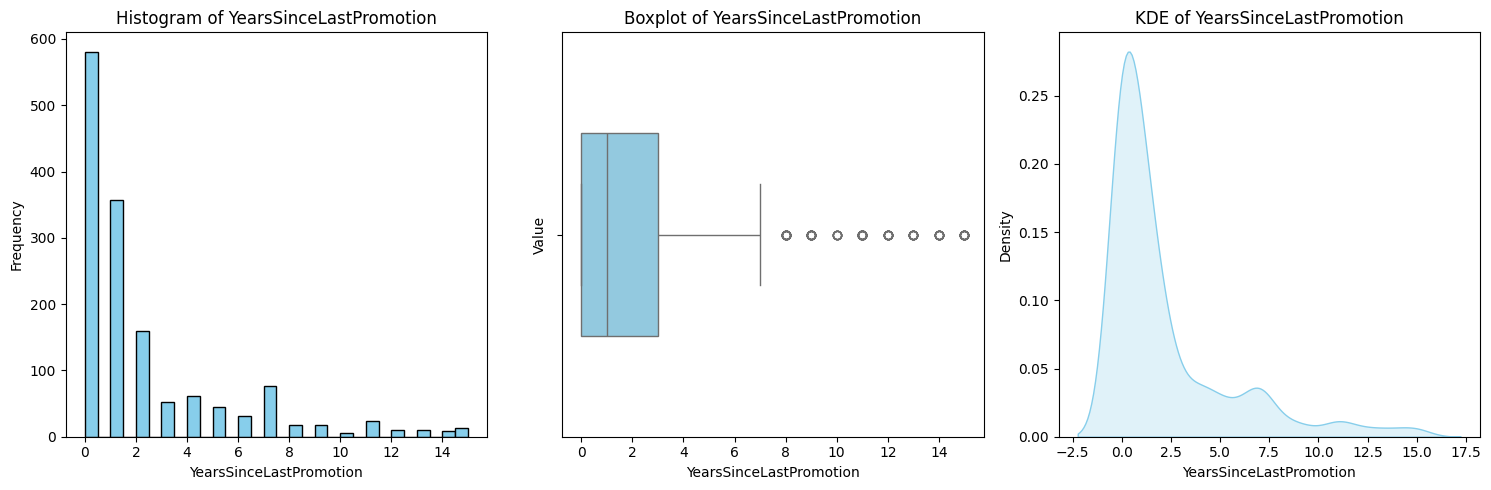

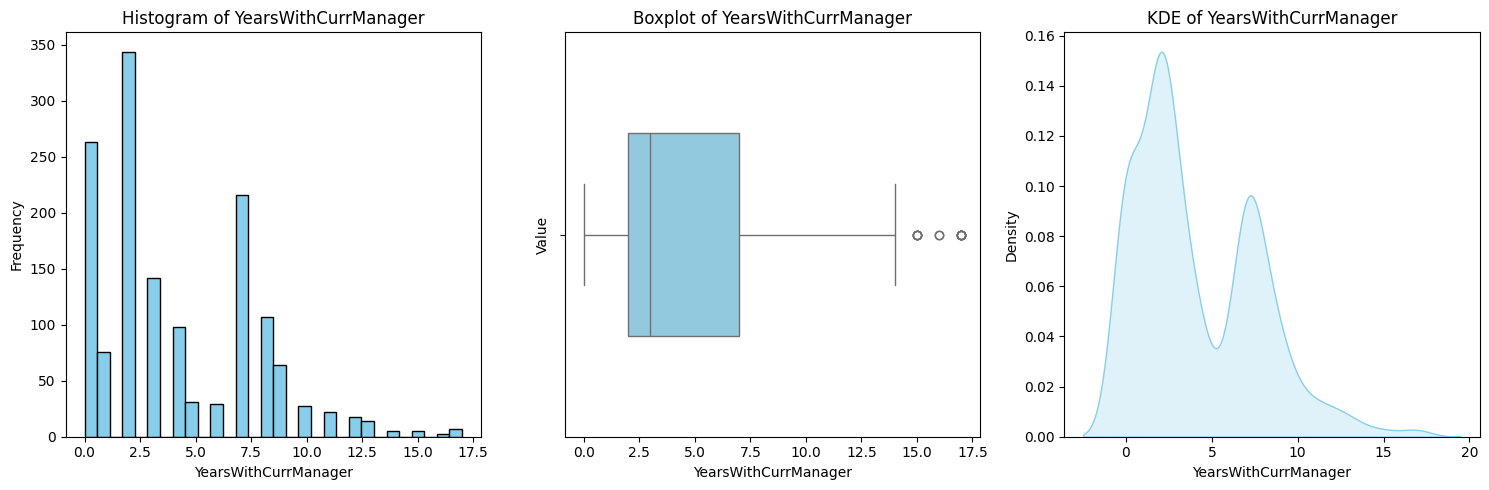

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns
numerical_data = data[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    data[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

#**Hypothesis and Visualization**

  **Hypothesis 01:** Higher job satisfaction is associated with lower attrition rates.
  
  **Null Hypothesis:** There is no relationship between job satisfaction and attrition.

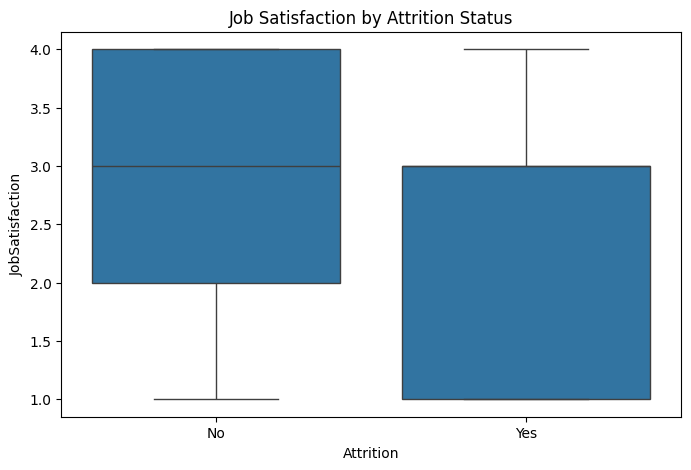

In [ ]:
# Boxplot of job satisfaction vs attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data)
plt.title('Job Satisfaction by Attrition Status')
plt.show()

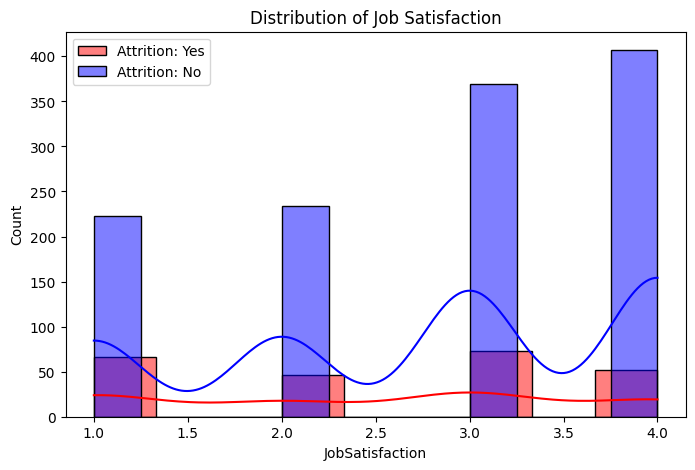

In [ ]:
# Histogram of job satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(data[data['Attrition'] == 'Yes']['JobSatisfaction'], kde=True, color='red', label='Attrition: Yes')
sns.histplot(data[data['Attrition'] == 'No']['JobSatisfaction'], kde=True, color='blue', label='Attrition: No')
plt.title('Distribution of Job Satisfaction')
plt.legend()
plt.show()

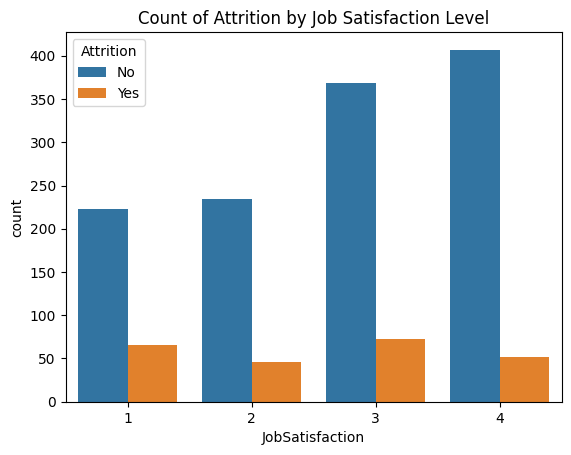

In [ ]:
# countplot of job satisfaction vs attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title('Count of Attrition by Job Satisfaction Level')
plt.show()

In [ ]:
# Separate data based on attrition status
attrition_yes = data[data['Attrition'] == 'Yes']['JobSatisfaction']
attrition_no = data[data['Attrition'] == 'No']['JobSatisfaction']


# Perform T-Test
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -3.9862267630568273, P-value: 7.04306674173115e-05


**T-Statistic Value: -3.986**

**Interpretation:**
This negative t-statistic indicates that the mean job satisfaction score for employees who left the company is significantly lower than that of employees who stayed. The magnitude (absolute value) suggests a strong effect, as it is over three standard deviations away from the mean difference expected under the null hypothesis.

**P-Value: 0.00007043**

**Interpretation:** The p-value represents the probability of observing a t-statistic as extreme as -3.986 under the null hypothesis. A p-value this small (much less than the typical significance level of 0.05) suggests strong evidence against the null hypothesis.

**Conclusion:**
Since the p-value is significantly low, you can reject the null hypothesis. This indicates that there is a statistically significant relationship between job satisfaction and attrition rates, supporting the hypothesis that higher job satisfaction is associated with lower attrition rates.

**Hypothesis 02:** Employees with a better work-life balance resulting lower attrition rates.

**Null Hypothesis:** There is no relationship between work-life balance and attrition rates

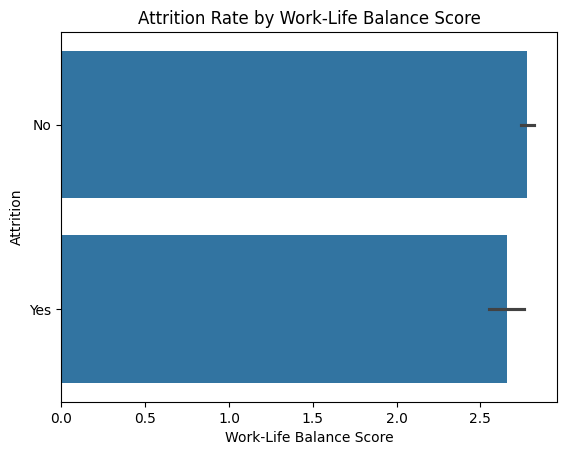

In [ ]:
sns.barplot(x='WorkLifeBalance', y='Attrition', data=data )
plt.title('Attrition Rate by Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Attrition')
plt.show()

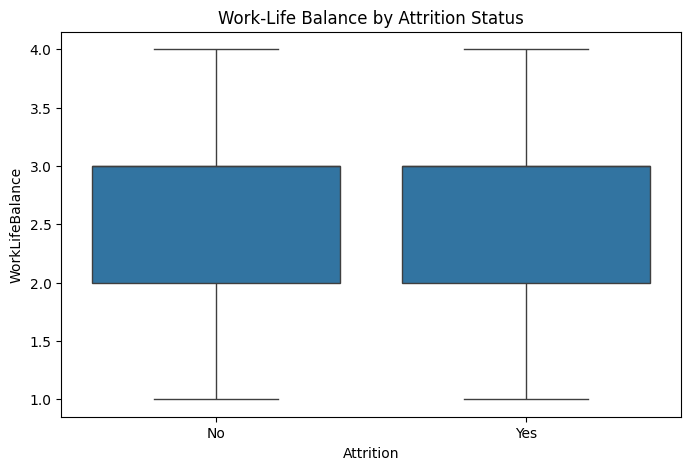

In [ ]:
#boxplot for
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=data)
plt.title('Work-Life Balance by Attrition Status')
plt.show()

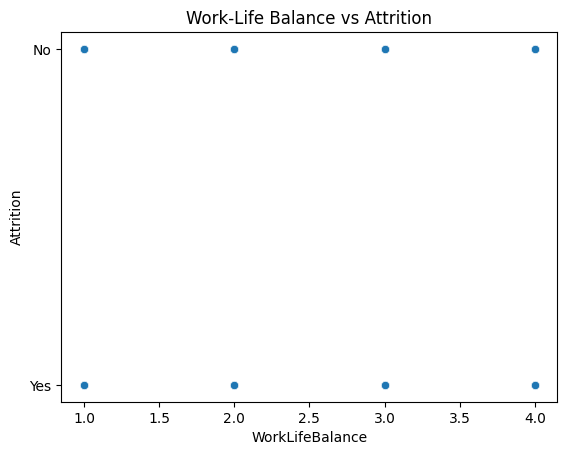

In [ ]:
sns.scatterplot(x='WorkLifeBalance', y='Attrition', data=data)
plt.title('Work-Life Balance vs Attrition')
plt.show()

In [ ]:
attrition_yes = data[data['Attrition'] == 'Yes']['WorkLifeBalance']
attrition_no = data[data['Attrition'] == 'No']['WorkLifeBalance']

# Perform T-Test
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -2.4548148934297767, P-value: 0.014211054989021307


**T-Statistic Value: -2.455**

This negative t-statistic suggests that employees with lower work-life balance tend to have higher attrition rates. A t-statistic of -2.455 indicates a statistically significant difference between the two groups' means.

**P-Value: 0.014**

The p-value (0.014) is below the common threshold of 0.05, meaning there is strong evidence to reject the null hypothesis. This implies that work-life balance is likely related to attrition, and employees with better work-life balance have lower attrition rates.

**Conclusion:**
The results support the hypothesis that better work-life balance is associated with lower attrition rates, as the t-test shows a significant difference between groups.

**Hypothesis 03:** Employees with more years at the company are less likely to leave.

**Null Hypothesis:** The number of years at the company does not affect attrition.

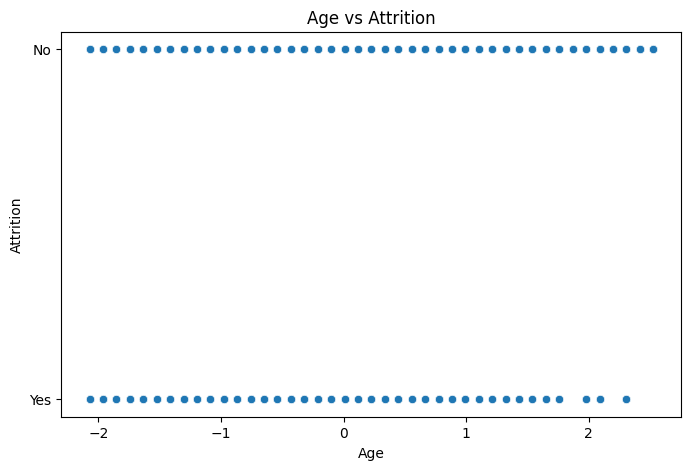

In [ ]:
#Scatter Plot Show the relationship between age and attrition.
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Attrition', data=data)
plt.title('Age vs Attrition')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

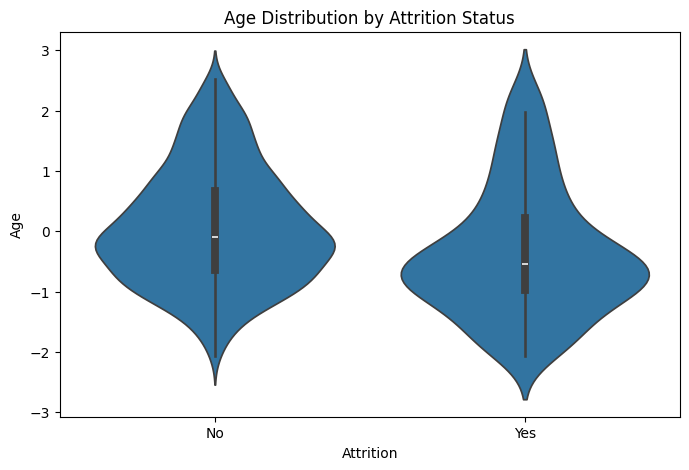

In [ ]:
#Violin Plot Visualize the distribution of age across attrition status.
plt.figure(figsize=(8, 5))
sns.violinplot(x='Attrition', y='Age', data=data)
plt.title('Age Distribution by Attrition Status')
plt

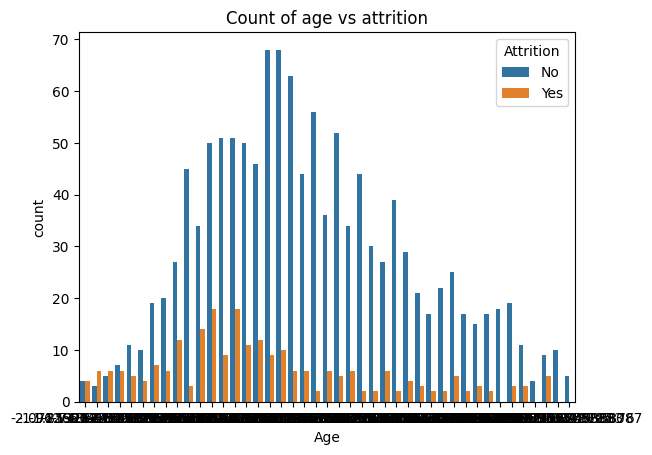

In [ ]:
#countplot of age vs attrition
sns.countplot(x='Age', hue='Attrition', data=data)
plt.title('Count of age vs attrition')
plt.show()

In [ ]:
years_at_company_yes = data[data['Attrition'] == 'Yes']['YearsAtCompany']
years_at_company_no = data[data['Attrition'] == 'No']['YearsAtCompany']

t_stat, p_value = stats.ttest_ind(years_at_company_yes, years_at_company_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -5.196308667025423, P-value: 2.3188716103863036e-07


**T-Statistic Value: -5.196**

**Interpretation:** This negative t-statistic suggests that the mean number of years at the company for employees who left is significantly lower than that of employees who stayed. The magnitude indicates a strong relationship, with the value being more than five standard deviations from what would be expected if the null hypothesis were true.

**P-Value: 0.0000002318**

**Interpretation:** The p-value indicates the probability of observing a t-statistic as extreme as -5.196 under the null hypothesis. A p-value this low (far below the common significance level of 0.05) provides strong evidence against the null hypothesis.

**Conclusion:**
Given the extremely low p-value, you can confidently reject the null hypothesis. This suggests that there is a statistically significant relationship between the number of years employees have spent at the company and their likelihood of leaving. In essence, employees who have been with the company longer are indeed less likely to leave, supporting the hypothesis.

**Hypothesis 04:**The higher the Employee Number, the less likely employees are to leave.

**Null Hypothesis:**Employee Number does not affect Attrition.

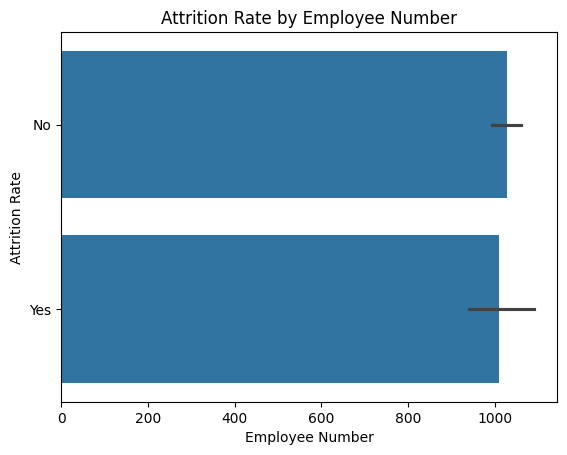

In [ ]:
sns.barplot(x='EmployeeNumber', y='Attrition', data=data)
plt.title('Attrition Rate by Employee Number')
plt.xlabel('Employee Number')
plt.ylabel('Attrition Rate')
plt.show()

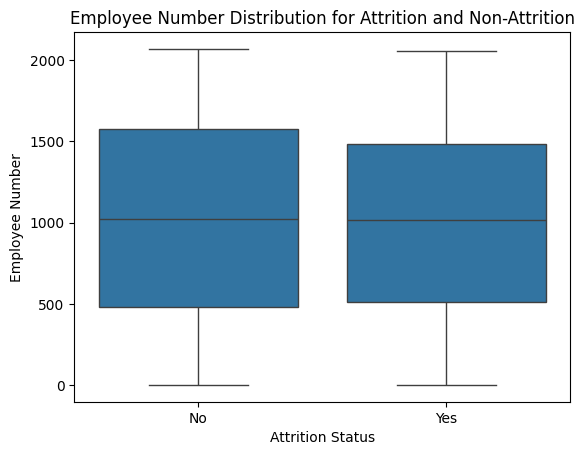

In [ ]:
sns.boxplot(x='Attrition', y='EmployeeNumber', data=data)
plt.title('Employee Number Distribution for Attrition and Non-Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()

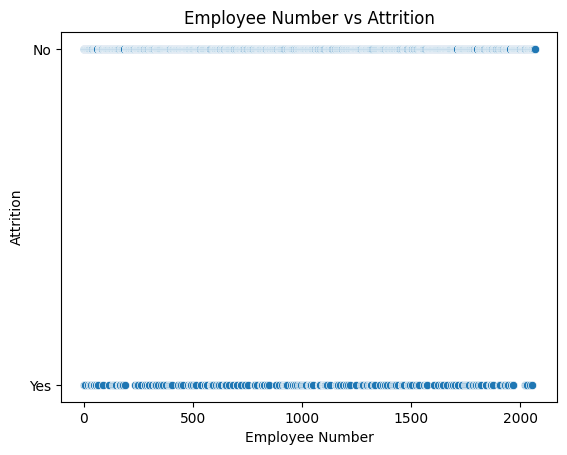

In [ ]:
sns.scatterplot(x='EmployeeNumber', y='Attrition', data=data)
plt.title('Employee Number vs Attrition')
plt.xlabel('Employee Number')
plt.ylabel('Attrition')
plt.show()

In [ ]:
attrition_yes = data[data['Attrition'] == 'Yes']['EmployeeNumber']
attrition_no = data[data['Attrition'] == 'No']['EmployeeNumber']

# Perform T-Test
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -0.4052843139019291, P-value: 0.6853275897297122


**T-Statistic value : -0.4053**

The T-statistic value of -0.4053 is close to zero, meaning there is a small difference between the average employee numbers of those who left and those who stayed. In this case, the difference is not statistically significant.

**P-Value: 0.6853**

A P-value of 0.6853 is much greater than the common threshold of 0.05. This means there is no significant relationship between Employee Number (tenure) and attrition rates.

**Conclusion:**

Since the p-value is large, we fail to reject the null hypothesis, meaning we have no strong evidence that Employee Number (tenure) is related to whether an employee stays or leaves the company. In simpler terms, the length of time someone has worked at the company does not significantly affect their likelihood of leaving.

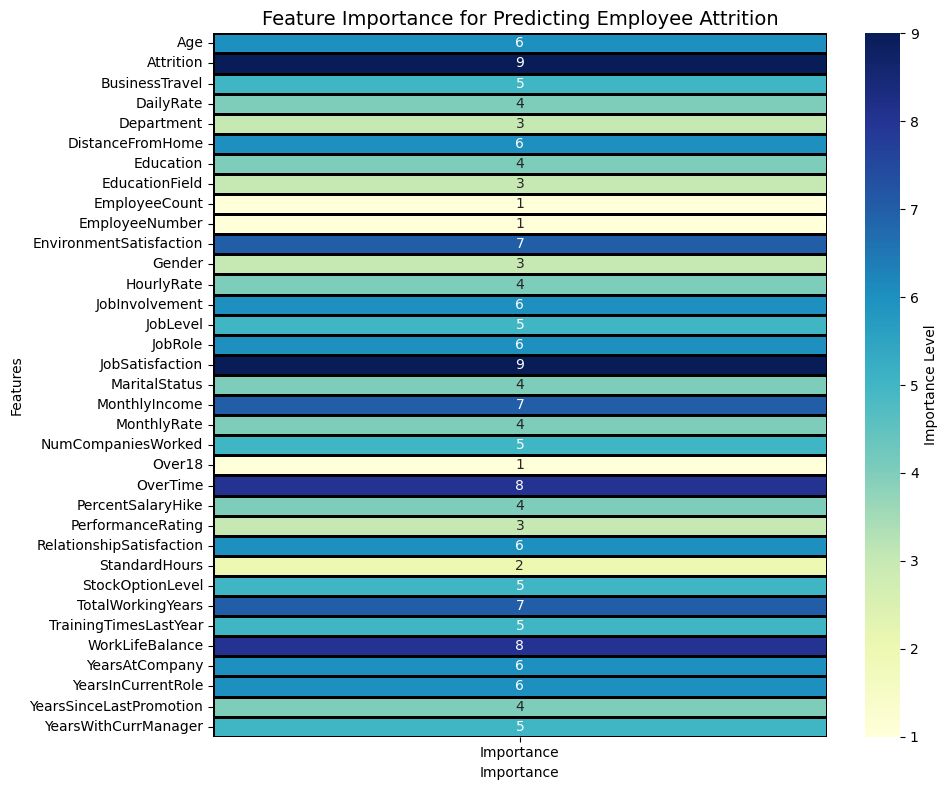

In [ ]:
#Correcting the data length issue by ensuring 'Importance' array has the same number of entries as 'Feature'
heatmapdata1 = {
    'Feature': ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
                'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
                'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
                'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager'],
    'Importance': [6, 9, 5, 4, 3, 6, 4, 3, 1, 1, 7, 3, 4, 6, 5, 6, 9, 4, 7, 4, 5, 1, 8, 4, 3, 6,
                   2, 5, 7, 5, 8, 6, 6, 4, 5]
}
# Converting the updated data into a DataFrame
df = pd.DataFrame(heatmapdata1)

# Creating a heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df.pivot_table(index='Feature', values='Importance')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Importance Level'}, linewidths=1, linecolor='black')

# Setting title and labels
plt.title('Feature Importance for Predicting Employee Attrition', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the heatmap
plt.tight_layout()
plt.show()
#refrence: Artificial Intiligence